In Yugioh, what is the probability that the first card drawn is either a quick play spell card or a trap card? Assume that no other cards have been drawn, that there is 15 trap cards and 10 quick play spell cards in a deck of 60 cards.

The sample space I am observing includes all possible cards you could draw, one trial of the simulation would be drawing to cards and checking them. I am measuring the amount of times that a quick play spell card or a trap card is drawn

Number of simulations: 100000
Drew trap or quick play spell card: 41682 times (0.4168 or 41.68%)
Drew other card: 58318 times (0.5832 or 58.32%)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


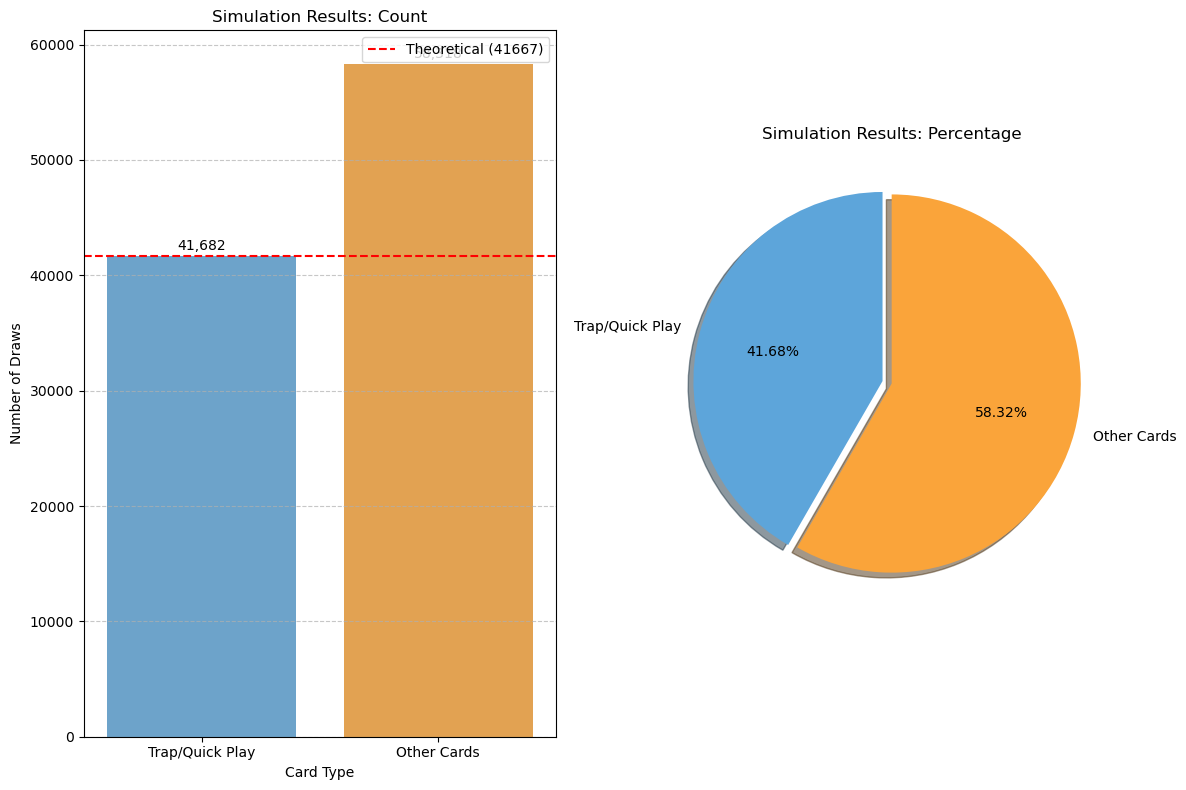

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the simulation parameters
np.random.seed(42)  # For reproducibility
num_simulations = 100000
deck_size = 60
trap_cards = 15
quick_play_cards = 10

# Run the simulation
results = []  # Store the results of each draw: 1 for success, 0 for failure

for _ in range(num_simulations):
    # Create a deck: 0 = regular card, 1 = trap card, 2 = quick play spell card
    deck = np.zeros(deck_size)
    deck[0:trap_cards] = 1  # First 15 cards are trap cards
    deck[trap_cards:trap_cards+quick_play_cards] = 2  # Next 10 cards are quick play spell cards
    
    # Shuffle the deck
    np.random.shuffle(deck)
    
    # Draw the first card
    first_card = deck[0]
    
    # Check if it's a trap card or quick play spell card
    if first_card == 1 or first_card == 2:
        results.append(1)  # Success
    else:
        results.append(0)  # Failure

# Calculate the counts and probabilities
success_count = sum(results)
failure_count = num_simulations - success_count
success_prob = success_count / num_simulations
failure_prob = failure_count / num_simulations

# Display results
print(f"Number of simulations: {num_simulations}")
print(f"Drew trap or quick play spell card: {success_count} times ({success_prob:.4f} or {success_prob*100:.2f}%)")
print(f"Drew other card: {failure_count} times ({failure_prob:.4f} or {failure_prob*100:.2f}%)")

# Create visualizations
plt.figure(figsize=(12, 8))

# 1. Bar chart showing counts
plt.subplot(1, 2, 1)
sns.barplot(x=['Trap/Quick Play', 'Other Cards'], y=[success_count, failure_count], palette=['#5DA5DA', '#FAA43A'])
plt.title('Simulation Results: Count')
plt.ylabel('Number of Draws')
plt.xlabel('Card Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on bars
for i, count in enumerate([success_count, failure_count]):
    plt.text(i, count + 500, f'{count:,}', ha='center')

# 2. Pie chart showing percentages
plt.subplot(1, 2, 2)
plt.pie([success_count, failure_count], 
        labels=['Trap/Quick Play', 'Other Cards'],
        autopct='%1.2f%%',
        colors=['#5DA5DA', '#FAA43A'],
        explode=(0.05, 0),
        shadow=True,
        startangle=90)
plt.title('Simulation Results: Percentage')

# Add a theoretical line to the bar chart
plt.subplot(1, 2, 1)
theoretical_success = (trap_cards + quick_play_cards) / deck_size * num_simulations
theoretical_failure = (1 - (trap_cards + quick_play_cards) / deck_size) * num_simulations
plt.axhline(y=theoretical_success, color='red', linestyle='--', label=f'Theoretical ({theoretical_success:.0f})')
plt.legend()

plt.tight_layout()
plt.show()